<a href="https://colab.research.google.com/github/taimoorsardar/Machine-Learning-Projects/blob/main/CensusIncomeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing the dataset


###Installing the package

In [ ]:
!pip install ucimlrepo

###Importing the dataset

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

#Importing relevant libraries

In [ ]:
# Importing necessary packages and libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Data Preprocessing

In [ ]:
# Inspect the first few rows of the features and target
print(X.head())
print(y.head())

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Check the data types of the features
print(X.dtypes)

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

In [ ]:
# Replace '?' with NaN
X.replace('?', np.nan, inplace=True)

# Check for missing values again
print(X.isnull().sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64


<ipython-input-53-32299edcc58b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)


In [ ]:
# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(include=[object]).columns

# Fill missing values in numerical columns with the mean
for column in numerical_columns:
    X[column].fillna(X[column].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
for column in categorical_columns:
    X[column].fillna(X[column].mode()[0], inplace=True)

# Confirm there are no missing values
print(X.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


<ipython-input-54-3cb27f1c5908>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(X[column].mean(), inplace=True)
<ipython-input-54-3cb27f1c5908>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(X[column].mode()[0], inplace=True)


In [ ]:
# Ensure y is a Series
y = y.iloc[:, 0] if isinstance(y, pd.DataFrame) else y

In [ ]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable
y = y.str.strip().map({'>50K': 1, '<=50K': 0})

In [ ]:
y = y.fillna(0).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [ ]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}


In [ ]:
# Train and evaluate the models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy, 'f1_score': f1}
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Accuracy: 0.8456971268682181
F1 Score: 0.3359765051395007
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12271
           1       0.56      0.24      0.34      2382

    accuracy                           0.85     14653
   macro avg       0.71      0.60      0.62     14653
weighted avg       0.82      0.85      0.82     14653



--- Decision Tree ---
Accuracy: 0.8039991810550741
F1 Score: 0.4157851912123678
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12271
           1       0.40      0.43      0.42      2382

    accuracy                           0.80     14653
   macro avg       0.65      0.65      0.65     14653
weighted avg       0.81      0.80      0.81     14653



--- Random Forest ---
Accuracy: 0.8467208080256603
F1 Score: 0.4351106639839034
              precision    recall  f1-score   support

           0       0.88      0.94      0.

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

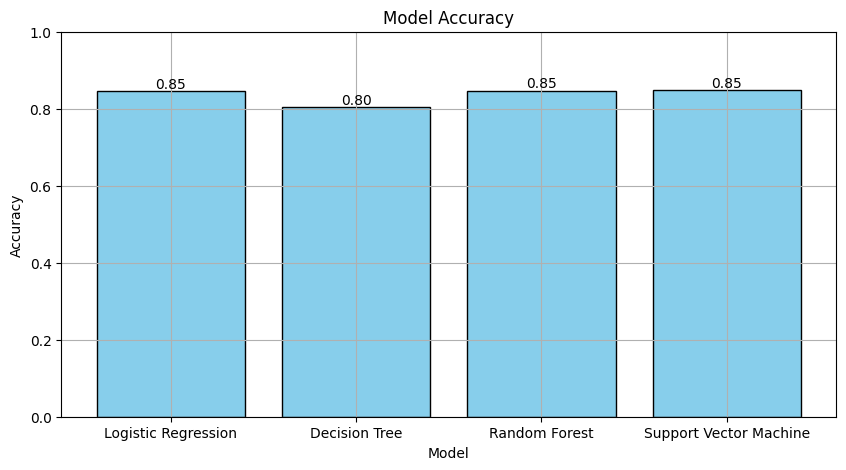

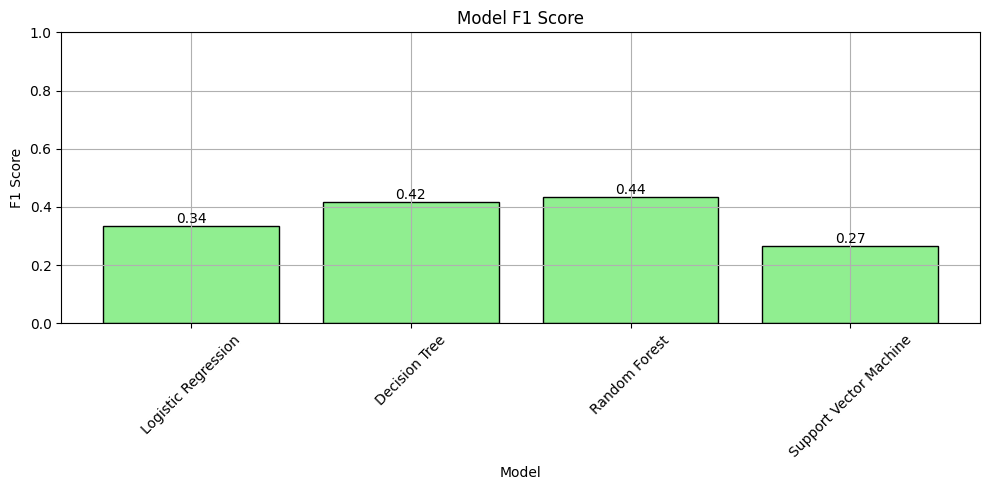

In [ ]:
import matplotlib.pyplot as plt
# Plot the results

# Plot for Model Accuracy
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df['accuracy'], color='skyblue', edgecolor='black')
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits for better comparison
plt.grid(True)
# Annotate bars with accuracy values
for index, value in enumerate(results_df['accuracy']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')



# Plot for Model F1 Score
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df['f1_score'], color='lightgreen', edgecolor='black')
plt.title('Model F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis limits for better comparison
plt.grid(True)

# Annotate bars with F1 score values
for index, value in enumerate(results_df['f1_score']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
